# Basics of Analyzing PSC Data Using Python/Jupyter/Viscid

## Tools

One way to analyze the data used by PSC is using Python, Jupyter and Viscid. Python is hopefully well known.
[Project Jupyter](https://jupyter.org/) let's you interact with Python (and other languages) through your web browser. With some setup, it is possible to run Jupyter remotely and interact with it through a local web broswer, which has the advantage that the data can remain in the remote location, only plots / movies are sent across the network.

[Viscid](https://viscid-hub.github.io/Viscid-docs/docs/master/) is Python viz library developed by a graduate student at UNH. It is built on top of **matplotlib** and helps to seamlessly read various data formats.



## An example

Let's presume you've run the small 2-d flatfoil sample case. The basics of making some plots based on the data generated are shown below.

### Importing modules

The below imports the modules needed for reading the PSC data and making some plots. Other than **viscid**, they are pretty standard.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import viscid
viscid.calculator.evaluator.enabled = True
from viscid.plot import vpyplot as vlt

%config InlineBackend.figure_format = 'retina'

### Open the data files

The path to the data will vary for your own run. You usually want to open the top-level `pfd.xdmf` file that encompasses all the individual output steps.

In [2]:
run = "/Users/kai/src/pppl-project/flatfoil/flatfoil_702/pfd.xdmf"
vf = viscid.load_file(run, force_reload=True)

### Make a plot

Select a particular output step (they are simply numbered consecutively). You can then plot a particular field by name.

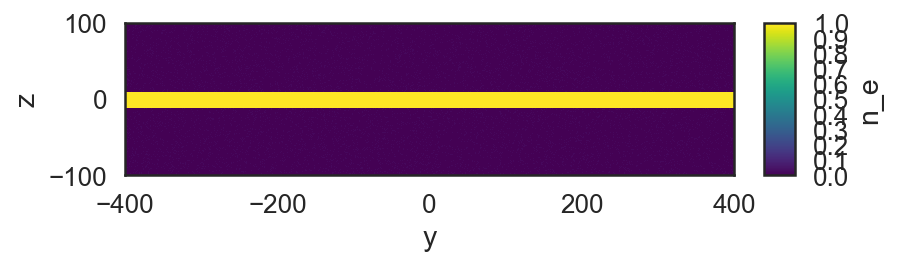

In [3]:
vf.activate_time(0)
vlt.plot(vf["n_e"]);

### Make another plot

Here, I select a later output and plot two quantities, which shows how some simple computations can be done.

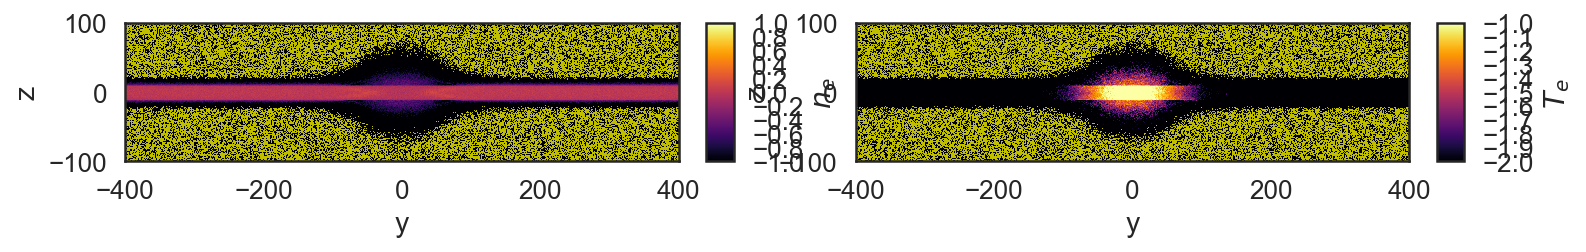

In [4]:
vf.activate_time(10)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
vlt.plot(vf["$n_e$=log10(n_e)"], clim=(-1,1), cmap="inferno");
plt.subplot(1, 2, 2)
vlt.plot(vf["$T_e$=log10(Txx_e+Tyy_e+Tzz_e)"], clim=(-2,-1), cmap="inferno");